In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import shap



df=pd.read_csv(r"C:\Users\kh\Downloads\obesity.csv")
df.head()

Note: you may need to restart the kernel to use updated packages.


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [ ]:
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
print(df.duplicated().sum())

24


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.duplicated().sum())

0


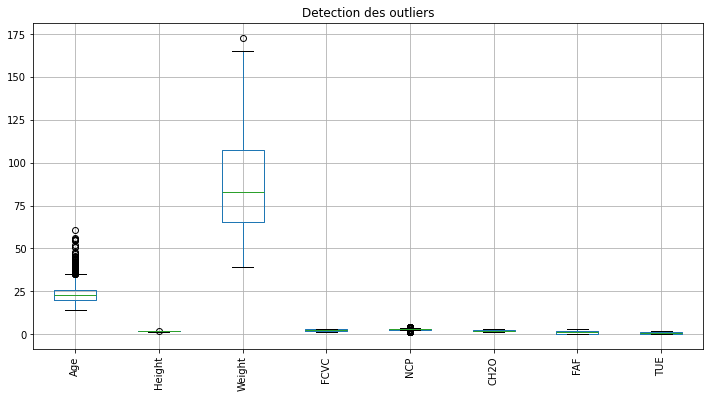

In [ ]:
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\kh\Downloads\obesity.csv")
df.head()
plt.figure(figsize=(12,6))
df.boxplot(rot=90)
plt.title("Detection des outliers")
plt.show()

In [ ]:
from scipy.stats import zscore 
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)
print("Nombre d'outliers detectes par case :")
print(outliers)

Nombre d'outliers detectes par case :
Age       24
Height     0
Weight     1
FCVC       0
NCP        0
CH2O       0
FAF        0
TUE        0
dtype: int64


In [ ]:
duplicates = df[df.duplicated(keep=False)]

In [ ]:
print(df.duplicated().sum()) 

24


In [ ]:
duplicates = df[df.duplicated(keep=False)]

print("Lignes dupliquées :")
print(duplicates)

Lignes dupliquées :
     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
97   Female  21.0    1.52    42.0                             no   no   3.0   
98   Female  21.0    1.52    42.0                             no   no   3.0   
105  Female  25.0    1.57    55.0                             no  yes   2.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
145    Male  21.0    1.62    70.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
208  Female  22.0    1.69    65.0                            yes  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
282  Female  18.0    1.62    55.0                            yes  yes   2.0   
295  Female  16.0    1.66    58.

In [ ]:
for col in df.columns:
    duplicate_col = df.duplicated(subset=[col], keep=False)
    if duplicate_col.any():
        print(f"Doublons détectés dans la colonne: {col}")
        print(df.loc[duplicate_col, [col]])


Doublons détectés dans la colonne: Gender
      Gender
0     Female
1     Female
2       Male
3       Male
4       Male
...      ...
2106  Female
2107  Female
2108  Female
2109  Female
2110  Female

[2111 rows x 1 columns]
Doublons détectés dans la colonne: Age
       Age
0     21.0
1     21.0
2     23.0
3     27.0
4     22.0
...    ...
2090  26.0
2091  26.0
2092  26.0
2093  26.0
2094  26.0

[744 rows x 1 columns]
Doublons détectés dans la colonne: Height
        Height
0     1.620000
1     1.520000
2     1.800000
3     1.800000
4     1.780000
...        ...
1629  1.697421
1637  1.750150
1683  1.755938
1779  1.603501
2068  1.697421

[588 rows x 1 columns]
Doublons détectés dans la colonne: Weight
          Weight
0      64.000000
1      56.000000
2      77.000000
3      87.000000
5      53.000000
...          ...
1523  120.860386
1525  120.000000
1543  116.160329
1545  120.860386
1613  120.000000

[644 rows x 1 columns]
Doublons détectés dans la colonne: family_history_with_overweight


In [ ]:

df_numeric = df.select_dtypes(include=['number'])


Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1


outliers_iqr = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()

print("Outliers détectés par la méthode IQR :")
print(outliers_iqr)


Outliers détectés par la méthode IQR :
Age       168
Height      1
Weight      1
FCVC        0
NCP       579
CH2O        0
FAF         0
TUE         0
dtype: int64


In [ ]:
df = df.drop_duplicates()
print(df.shape)  

(2087, 17)


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


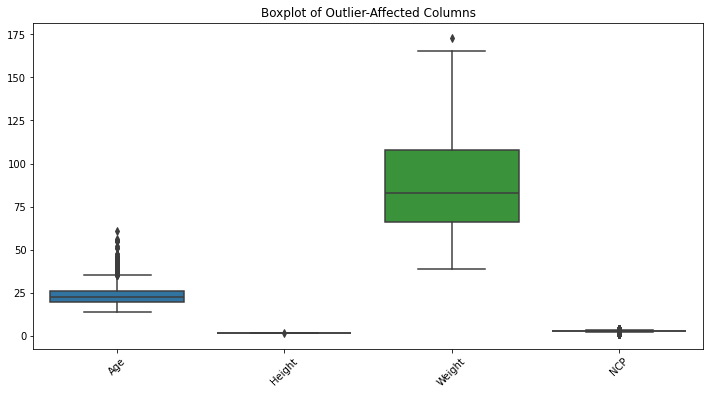

In [ ]:

df_numeric = df.select_dtypes(include=['number'])

print(df_numeric.columns)


plt.figure(figsize=(12, 6))


sns.boxplot(data=df_numeric[['Age', 'Height', 'Weight', 'NCP']])

plt.xticks(rotation=45)
plt.title("Boxplot of Outlier-Affected Columns")
plt.show()
